Pymaceuticals Inc.
------------------------------------------------------------------

Analysis:

- Analysis was made by merging mouse metadata and study results. One duplicate mouse id was removed from the data.

- Total number of timepoints for all mice tested is more for capomulin and ramicane.

- Male mice(51%) are more than female mice(49%).

- Analysis was made by getting the greatest time point for each mouse for mice treated with Capomulin, Ramicane, Infubinol, Ceftamin. 

- Infubinol has  potential outliers 36.321346 which lower than the lower bound
 
- line plot was generated for tumor volume vs timepoint for one mouse l509 tumor volume got increased intially and then reduced for capomulin treated drug which indicates that capomulin is working.

- The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84 which indicates there is strong correlation. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st
from sklearn import datasets
from scipy.stats import linregress

In [3]:
# reading csv files with pandas
mouse_data = pd.read_csv("data/Mouse_metadata.csv")
results_data = pd.read_csv("data/Study_results.csv")

# Combined the data into a single dataset
combined_data = pd.merge(mouse_data, results_data, how = "outer",on = "Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Finding Unique mouse Id count
combined_data["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[combined_data.duplicated(['Mouse ID',"Timepoint"])]["Mouse ID"].unique()


array(['g989'], dtype=object)

In [6]:
# all the data for the duplicate mouse ID
combined_data.loc[combined_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# clean dataframe after excluding the duplicate mouse id
combined_data_df = combined_data.loc[combined_data["Mouse ID"] != "g989"]
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Number of mice in the cleaned data frame
combined_data_df["Mouse ID"].nunique()

248

In [9]:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

combined_data_df.set_index("Drug Regimen")

mean_tumor_volume = combined_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

median_tumor_volume = combined_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

var_tumor_volume = combined_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

std_tumor_volume = combined_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

std_err_tumor_volume = combined_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"MeanTumorVolume" : mean_tumor_volume, 
                           "MedianTumorVolume" : median_tumor_volume,
                           "TumorVolumeVariance":var_tumor_volume,
                           "TumorVolumeStd.Dev.": std_tumor_volume,
                           "TumorVolumeStd.Err.": std_err_tumor_volume})
summary_df





,MeanTumorVolume,MedianTumorVolume,TumorVolumeVariance,TumorVolumeStd.Dev.,TumorVolumeStd.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Mice Tested')

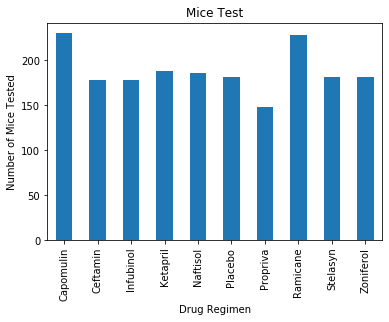

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
num_mouse_tested_per_regimen = combined_data_df.groupby("Drug Regimen").count()["Mouse ID"]
num_mouse_tested_per_regimen
ax = num_mouse_tested_per_regimen.plot(kind="bar", title = "Mice Test")
ax.set_ylabel("Number of Mice Tested")


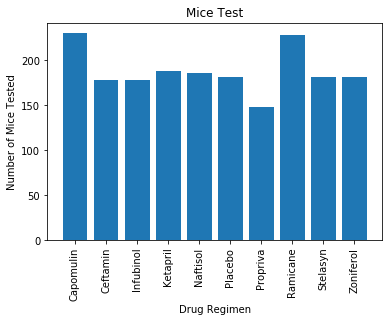

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(num_mouse_tested_per_regimen.index,num_mouse_tested_per_regimen.values)
plt.title("Mice Test")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = "vertical")
plt.show()

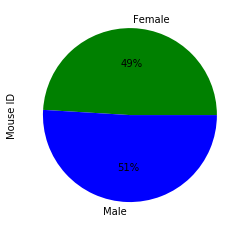

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = combined_data_df.groupby("Sex").count()["Mouse ID"]
sex_distribution.plot(kind="pie", autopct = "%1.0f%%", colors=["green","blue"] )

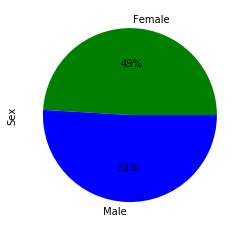

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution.values,labels=sex_distribution.index, autopct="%1.0f%%", textprops={'color':"black"},colors=["green","blue"])
plt.ylabel("Sex")
plt.show()

In [46]:
# getting the last (greatest) timepoint for each mouse
df = combined_data_df.groupby(["Drug Regimen","Mouse ID"]).agg({"Timepoint":"max"})
df = df.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"]]
df = df.reset_index()

# Merge this df with the original DataFrame to get the tumor volume at the last timepoint
new_df =pd.merge(combined_data_df,df,how="inner",on=["Timepoint","Drug Regimen","Mouse ID"])
new_df = new_df[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
new_df.sort_values(by=["Drug Regimen"]).reset_index()

,index,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,32,j246,Capomulin,35,38.753265
1,36,v923,Capomulin,45,40.658124
2,35,w150,Capomulin,10,39.952347
3,34,j119,Capomulin,45,38.125164
4,39,l509,Capomulin,45,41.483008
...,...,...,...,...,...
95,46,r921,Ramicane,30,43.419381
96,47,w678,Ramicane,5,43.166373
97,48,y449,Ramicane,15,44.183451
98,23,r811,Ramicane,45,37.225650


In [47]:
# used for loop to Put treatments into a list(treatment_list) 
treatment_list = []
for treatment in new_df["Drug Regimen"]:
    if treatment not in treatment_list:
        treatment_list.append(treatment)

# Empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculated the IQR and quantitatively determine if there are any potential outliers.
for drug in  treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = new_df.loc[new_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset    
    tumor_volume_data.append(volume)
   
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    iqr
    lowerbound = lowerq - (1.5 * iqr)
    lowerbound
    upperbound = upperq + 1.5 * iqr
    upperbound
    outlier = volume.loc[(volume<lowerbound) | (volume>upperbound)]
    
    print(f"{drug}'s potential outliers: {outlier}")

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


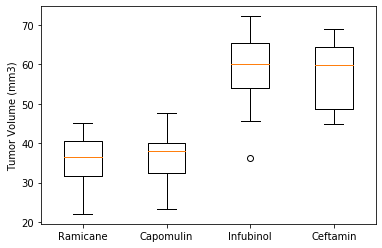

In [50]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1,ax1=plt.subplots()
ax1.boxplot(tumor_volume_data, labels=treatment_list)
plt.ylabel("Tumor Volume (mm3)")
plt.show()


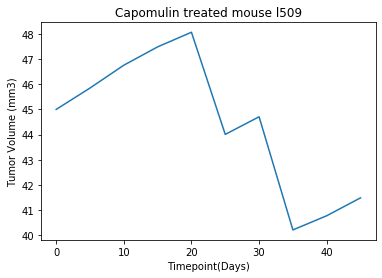

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x = combined_data_df.loc[combined_data_df["Mouse ID"]=="l509","Timepoint"]
y = combined_data_df.loc[combined_data_df["Mouse ID"]=="l509","Tumor Volume (mm3)"]
plt.plot(x, y)
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treated mouse l509")
plt.show()


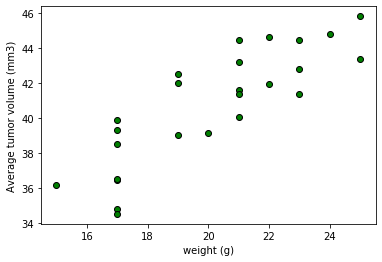

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = combined_data_df[["Mouse ID",	"Drug Regimen",	"Weight (g)", "Tumor Volume (mm3)"]]
capo_df1 = capo_df.loc[capo_df["Drug Regimen"]=="Capomulin"]
capo_df2 = capo_df1.groupby(["Mouse ID"]).mean()
plt.scatter(capo_df2["Weight (g)"],capo_df2["Tumor Volume (mm3)"], marker="o", facecolors="green", edgecolors="black",
             alpha=1)
plt.xlabel("weight (g)")             
plt.ylabel("Average tumor volume (mm3)")
plt.show()
capo_df2 = capo_df2.reset_index()



In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_Weight = capo_df2.iloc[:,1]
avg_tumor_volume = capo_df2.iloc[:,2]
correlation = st.pearsonr(mouse_Weight,avg_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


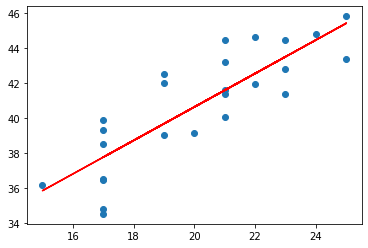

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capo_df2['Weight (g)']
y_values = capo_df2['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.show()
